## 참고 문서

https://github.com/christianversloot/machine-learning-articles/blob/main/how-to-use-k-fold-cross-validation-with-keras.md

## 데이터 전처리

In [1]:
import tensorflow as tf
import tensorflow.keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
from PIL import Image
import cv2

In [2]:
img_dir = '/Users/User/303/KT_32px/food_competition_KT_set1/train/'
categoris = os.listdir(img_dir)
nb_categoris = len(categoris)

In [3]:
data = []
labels = []
for i in range(nb_categoris) :
    a = glob.glob(img_dir+'/'+categoris[i]+'/*.jpg')
    for j in a :
        image=tensorflow.keras.preprocessing.image.load_img(j, color_mode='rgb')
        image=np.array(image)
        data.append(image)
        labels.append(i)

In [4]:
inputs=np.array(data)
inputs=inputs/255.0
inputs.shape

(10000, 32, 32, 3)

In [5]:
labels = np.array(labels)
targets=labels.reshape(-1,1)
targets.shape

(10000, 1)

In [7]:
targets[9999]

array([49])

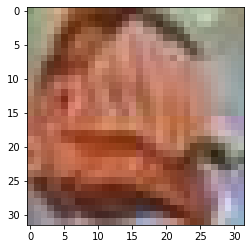

In [27]:
plt.imshow(inputs[9999])
#야미

In [95]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D,MaxPooling2D,ReLU,LeakyReLU,ELU,BatchNormalization,Dropout,GlobalAveragePooling2D
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from keras.regularizers import l2
from sklearn.model_selection import KFold
import numpy as np

# Model configuration
batch_size = 32
img_width, img_height, img_num_channels = 32, 32, 3
loss_function = sparse_categorical_crossentropy
no_classes = 50
no_epochs = 50
optimizer = Adam()
verbosity = 1
num_folds = 5


In [37]:
targets.shape

(10000, 1)

In [38]:
#np.save('targets.npy',targets)

In [51]:
inputs.shape

(10000, 32, 32, 3)

In [40]:
act=LeakyReLU(0.01)
#act=ReLU()
#act=ELU()

In [41]:
# def model_fn():
#     model = Sequential()
#     model.add(Conv2D(32, kernel_size = 3, activation='relu', input_shape = (128, 128, 3)))
#     model.add(MaxPooling2D(pool_size=(2, 2)))
#     model.add(BatchNormalization())
#     #model.add(MaxPooling2D(pool_size=(2, 2)))
#     model.add(Conv2D(32, kernel_size = 3, activation='relu'))
#     model.add(BatchNormalization())
#     model.add(Conv2D(32, kernel_size = 5, padding='same', activation='relu'))
#     model.add(MaxPooling2D(pool_size=(2, 2)))
#     model.add(BatchNormalization())
#     model.add(Dropout(0.4))

#     model.add(Conv2D(64, kernel_size = 3, activation='relu'))
#     model.add(BatchNormalization())
#     model.add(Conv2D(64, kernel_size = 3, activation='relu'))
#     model.add(BatchNormalization())
#     model.add(Conv2D(64, kernel_size = 5,padding='same', activation='relu'))
#     model.add(MaxPooling2D(pool_size=(2, 2)))
#     model.add(BatchNormalization())
#     model.add(Dropout(0.4))

#     model.add(Conv2D(32, kernel_size = 3, activation='relu'))
#     model.add(BatchNormalization())
#     model.add(Conv2D(32, kernel_size = 3, activation='relu'))
#     model.add(BatchNormalization())
#     model.add(Conv2D(32, kernel_size = 3, activation='relu'))
#     model.add(Conv2D(16, kernel_size = 3, activation='relu'))
#     #model.add(Conv2D(4, kernel_size = 3, activation='relu'))
#     model.add(Flatten())
#     model.add(Dropout(0.4))
#     model.add(Dense(128,activation='relu'))
#     model.add(Dense(50, activation='softmax'))
#     return model

In [42]:
# # 40~50퍼
# def model_fn():
#     model = Sequential()

#     model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
#     model.add(BatchNormalization())
#     model.add(MaxPooling2D(pool_size=(2, 2)))
#     model.add(Dropout(0.25))

#     model.add(Conv2D(64, (3, 3), activation='relu'))
#     model.add(BatchNormalization())
#     model.add(MaxPooling2D(pool_size=(2, 2)))
#     model.add(Dropout(0.25))

#     model.add(Conv2D(128, (3, 3), activation='relu'))
#     model.add(BatchNormalization())
#     model.add(MaxPooling2D(pool_size=(2, 2)))
#     model.add(Dropout(0.25))

#     model.add(Flatten())
#     model.add(Dense(512, activation='relu'))
#     model.add(BatchNormalization())
#     model.add(Dropout(0.5))
#     model.add(Dense(50, activation='softmax')) # 2 because we have cat and dog classes
#     return model

In [71]:
# #제일 잘나옴
# def model_fn():
#     model = Sequential()
#     model.add(Conv2D(32, kernel_size=(3, 3), padding='same',activation=act, input_shape=(32,32,3)))
#     model.add(MaxPooling2D(pool_size=(2, 2)))
#     model.add(Conv2D(64, kernel_size=(3, 3), padding='same',activation=act))
#     model.add(MaxPooling2D(pool_size=(2, 2)))
#     model.add(Conv2D(128, kernel_size=(3, 3), padding='same',activation=act))
#     model.add(MaxPooling2D(pool_size=(2, 2)))
#     model.add(Flatten())
#     model.add(Dense(256, activation=act))
#     model.add(Dense(128, activation=act))
#     model.add(Dense(no_classes, activation='softmax'))
#     return model

In [100]:
# # 55.8399999%
# # Model configuration
# # batch_size = 32
# # img_width, img_height, img_num_channels = 32, 32, 3
# # loss_function = sparse_categorical_crossentropy
# # no_classes = 50
# # no_epochs = 50
# # optimizer = Adam()
# # verbosity = 1
# # num_folds = 5
# def model_fn():
#     model = Sequential()

#     # Convolutional Layer
#     model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(32, 32, 3), activation=act, padding='same'))
#     model.add(BatchNormalization())
#     model.add(Conv2D(filters=32, kernel_size=(3, 3),  activation=act, padding='same'))
#     model.add(BatchNormalization())
#     # Pooling layer
#     model.add(MaxPooling2D(pool_size=(2, 2)))
#     # Dropout layers
#     model.add(Dropout(0.25))

#     model.add(Conv2D(filters=64, kernel_size=(3, 3),  activation=act, padding='same'))
#     model.add(BatchNormalization())
#     model.add(Conv2D(filters=64, kernel_size=(3, 3),activation=act, padding='same'))
#     model.add(BatchNormalization())
#     model.add(MaxPooling2D(pool_size=(2, 2)))
#     model.add(Dropout(0.25))

#     model.add(Conv2D(filters=128, kernel_size=(3, 3), activation=act, padding='same'))
#     model.add(BatchNormalization())
#     model.add(Conv2D(filters=128, kernel_size=(3, 3),  activation=act, padding='same'))
#     model.add(BatchNormalization())
#     model.add(MaxPooling2D(pool_size=(2, 2)))
#     model.add(Dropout(0.25))

#     model.add(Flatten())
#     # model.add(Dropout(0.2))
#     model.add(Dense(128, activation=act))
#     model.add(Dropout(0.25))
#     model.add(Dense(50, activation='softmax'))
#     return model

In [101]:
# Model configuration
# batch_size = 32
# img_width, img_height, img_num_channels = 32, 32, 3
# loss_function = sparse_categorical_crossentropy
# no_classes = 50
# no_epochs = 50
# optimizer = Adam()
# verbosity = 1
# num_folds = 5
def model_fn():
    model = Sequential()

    # Convolutional Layer
    model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(32, 32, 3), activation=act, padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(filters=32, kernel_size=(3, 3),  activation=act, padding='same'))
    model.add(BatchNormalization())
    # Pooling layer
    model.add(MaxPooling2D(pool_size=(2, 2)))
    # Dropout layers
    model.add(Dropout(0.25))

    model.add(Conv2D(filters=64, kernel_size=(3, 3),  activation=act, padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(filters=64, kernel_size=(3, 3),activation=act, padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(filters=128, kernel_size=(3, 3), activation=act, padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(filters=128, kernel_size=(3, 3),  activation=act, padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    
    model.add(Conv2D(filters=256, kernel_size=(3, 3), activation=act, padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(filters=256, kernel_size=(3, 3),  activation=act, padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))


    model.add(Flatten())
    # model.add(Dropout(0.2))
    model.add(Dense(128, activation=act))
    model.add(Dropout(0.25))
    model.add(Dense(50, activation='softmax'))
    return model

In [102]:
model=model_fn()
model.summary()

Model: "sequential_63"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_251 (Conv2D)         (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_122 (Ba  (None, 32, 32, 32)       128       
 tchNormalization)                                               
                                                                 
 conv2d_252 (Conv2D)         (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_123 (Ba  (None, 32, 32, 32)       128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_189 (MaxPooli  (None, 16, 16, 32)       0         
 ng2D)                                                           
                                                     

### Loss : sparse_categorical_crossentropy 사용

In [103]:
# sparse_categorical_crossentropy -> target이 int인경우 ->얘가 속도 더 빠르대
# categorical_crossentropy -> target이 ont-hot encoding된경우 사용

In [104]:
# Define the K-fold Cross Validator
kfold = KFold(n_splits=num_folds, shuffle=True,random_state = 5)

# K-fold Cross Validation model evaluation
fold_no = 1

# Define per-fold score containers
acc_per_fold = []
loss_per_fold = []
for train, test in kfold.split(inputs, targets):
    #print(train)
    #print(test)
    model=model_fn()
    # Compile the model
    model.compile(loss=sparse_categorical_crossentropy,
                optimizer=optimizer,
                metrics=['accuracy'])


    # Generate a print
    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no} ...')

    # Fit data to model
    history = model.fit(inputs[train], targets[train],
                  batch_size=batch_size,
                  epochs=no_epochs,
                  validation_data=(inputs[test], targets[test]),
                  verbose=verbosity)

    # Generate generalization metrics
    scores = model.evaluate(inputs[test], targets[test], verbose=1)
    print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
    acc_per_fold.append(scores[1] * 100)
    loss_per_fold.append(scores[0])

    # Increase fold number
    fold_no = fold_no + 1

------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/50
250/250 [==============================] - 3s 7ms/step - loss: 3.6808 - accuracy: 0.0664 - val_loss: 4.1775 - val_accuracy: 0.0285
Epoch 2/50
250/250 [==============================] - 1s 6ms/step - loss: 3.2261 - accuracy: 0.1110 - val_loss: 3.2611 - val_accuracy: 0.1420
Epoch 3/50
250/250 [==============================] - 1s 6ms/step - loss: 2.9531 - accuracy: 0.1789 - val_loss: 2.7525 - val_accuracy: 0.2090
Epoch 4/50
250/250 [==============================] - 1s 6ms/step - loss: 2.7797 - accuracy: 0.2106 - val_loss: 2.6799 - val_accuracy: 0.2285
Epoch 5/50
250/250 [==============================] - 1s 6ms/step - loss: 2.6134 - accuracy: 0.2615 - val_loss: 2.4714 - val_accuracy: 0.2895
Epoch 6/50
250/250 [==============================] - 2s 7ms/step - loss: 2.5166 - accuracy: 0.2774 - val_loss: 2.5964 - val_accuracy: 0.2705
Epoch 7/50
250/250 [==============================]

Epoch 6/50
250/250 [==============================] - 2s 7ms/step - loss: 2.4490 - accuracy: 0.3005 - val_loss: 2.3327 - val_accuracy: 0.3200
Epoch 7/50
250/250 [==============================] - 2s 7ms/step - loss: 2.3588 - accuracy: 0.3271 - val_loss: 2.1627 - val_accuracy: 0.3665
Epoch 8/50
250/250 [==============================] - 2s 8ms/step - loss: 2.2279 - accuracy: 0.3530 - val_loss: 2.1725 - val_accuracy: 0.3740
Epoch 9/50
250/250 [==============================] - 2s 7ms/step - loss: 2.1738 - accuracy: 0.3766 - val_loss: 2.2628 - val_accuracy: 0.3770
Epoch 10/50
250/250 [==============================] - 2s 9ms/step - loss: 2.0784 - accuracy: 0.3911 - val_loss: 1.9775 - val_accuracy: 0.4260
Epoch 11/50
250/250 [==============================] - 2s 8ms/step - loss: 2.0293 - accuracy: 0.4019 - val_loss: 2.1738 - val_accuracy: 0.3765
Epoch 12/50
250/250 [==============================] - 2s 7ms/step - loss: 1.9339 - accuracy: 0.4181 - val_loss: 2.2395 - val_accuracy: 0.3550
Epo

250/250 [==============================] - 2s 8ms/step - loss: 1.7540 - accuracy: 0.4753 - val_loss: 1.9305 - val_accuracy: 0.4570
Epoch 17/50
250/250 [==============================] - 2s 8ms/step - loss: 1.6832 - accuracy: 0.5023 - val_loss: 2.0354 - val_accuracy: 0.4190
Epoch 18/50
250/250 [==============================] - 2s 7ms/step - loss: 1.6190 - accuracy: 0.5017 - val_loss: 2.0331 - val_accuracy: 0.4350
Epoch 19/50
250/250 [==============================] - 2s 8ms/step - loss: 1.5705 - accuracy: 0.5251 - val_loss: 1.8640 - val_accuracy: 0.4805
Epoch 20/50
250/250 [==============================] - 2s 7ms/step - loss: 1.5265 - accuracy: 0.5211 - val_loss: 1.8687 - val_accuracy: 0.4830
Epoch 21/50
250/250 [==============================] - 2s 8ms/step - loss: 1.4498 - accuracy: 0.5523 - val_loss: 1.9054 - val_accuracy: 0.4760
Epoch 22/50
250/250 [==============================] - 2s 8ms/step - loss: 1.4006 - accuracy: 0.5659 - val_loss: 1.8915 - val_accuracy: 0.4765
Epoch 23/50

In [105]:
# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')


------------------------------------------------------------------------
Score per fold
------------------------------------------------------------------------
> Fold 1 - Loss: 2.11978816986084 - Accuracy: 55.09999990463257%
------------------------------------------------------------------------
> Fold 2 - Loss: 2.4143691062927246 - Accuracy: 53.94999980926514%
------------------------------------------------------------------------
> Fold 3 - Loss: 2.2962629795074463 - Accuracy: 56.550002098083496%
------------------------------------------------------------------------
> Fold 4 - Loss: 2.167694568634033 - Accuracy: 55.549997091293335%
------------------------------------------------------------------------
> Fold 5 - Loss: 2.1754817962646484 - Accuracy: 55.299997329711914%
------------------------------------------------------------------------
Average scores for all folds:
> Accuracy: 55.28999924659729 (+- 0.8351052949973962)
> Loss: 2.2347193241119383
----------------------------